In [2]:
import sys
sys.path.append('../figures/')

import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist

from makeCorner import *

az.rcParams["plot.max_subplots"] = 80

In [3]:
# cdf_file_peak = "/home/max.lalleman/CBC_Stoch_Search/gwbcbcmodeling/gwbcbcmodeling/New_Code_New_sample/Varying_Peak_sigmoid/cdf_files/CBC_z_0_4.cdf"
cdf_file_peak =  "../data/RUNS/peak_run_no_delta_middle_z_until_0dot08.cdf"
# cdf_file_power_law = "/home/max.lalleman/CBC_Stoch_Search/gwbcbcmodeling/gwbcbcmodeling/New_Code_New_sample/Varying_Power_Law_Sigmoid/cdf_files/CBC_z_0_to_4_analysis_high_low_for_mMax.cdf"
# "../RUNS/CBC_O3_Power_Law.cdf"
cdf_file_power_law = "../data/RUNS/power_law_only_high_sigmoids.cdf"

data_peak = az.from_netcdf(cdf_file_peak)
data_power_law = az.from_netcdf(cdf_file_power_law)

samps_peak = data_peak.posterior.stack(draws=("chain", "draw"))
samps_power_law = data_power_law.posterior.stack(draws=("chain", "draw"))

In [3]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "high_alpha":dist.Normal(-2,3),
    "width_alpha":dist.Uniform(-1,1),
    "middle_z_alpha":dist.Uniform(0,0.8),
    "mu_m1":dist.Uniform(15,60),
    "mMin":dist.Uniform(5,15),
    "high_mMin":dist.Uniform(5, 15),
    "width_mMin":dist.Uniform(-1,1),
    "middle_z_mMin":dist.Uniform(0,0.8),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-6,0),
    "high_f_peak": dist.Uniform(-6,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,0.8),
    "sig_m1": dist.Uniform(1.5,15),
    "mMax":dist.Uniform(50,100),
    "high_mMax":dist.Uniform(50, 100),
    "width_mMax":dist.Uniform(-1,1),
    "middle_z_mMax":dist.Uniform(0,0.8),
    "dmMax":dist.Uniform(0.5,1.5),
    "high_dmMax":dist.Uniform(0.5,1.5),
    "width_dmMax":dist.Uniform(-1,1),
    "middle_z_dmMax":dist.Uniform(0,0.8),
    "dmMin":dist.Uniform(-1,0.5),
    "high_dmMin":dist.Uniform(-1,0.5),
    "width_dmMin":dist.Uniform(-1,1),
    "middle_z_dmMin":dist.Uniform(0,0.8),
}

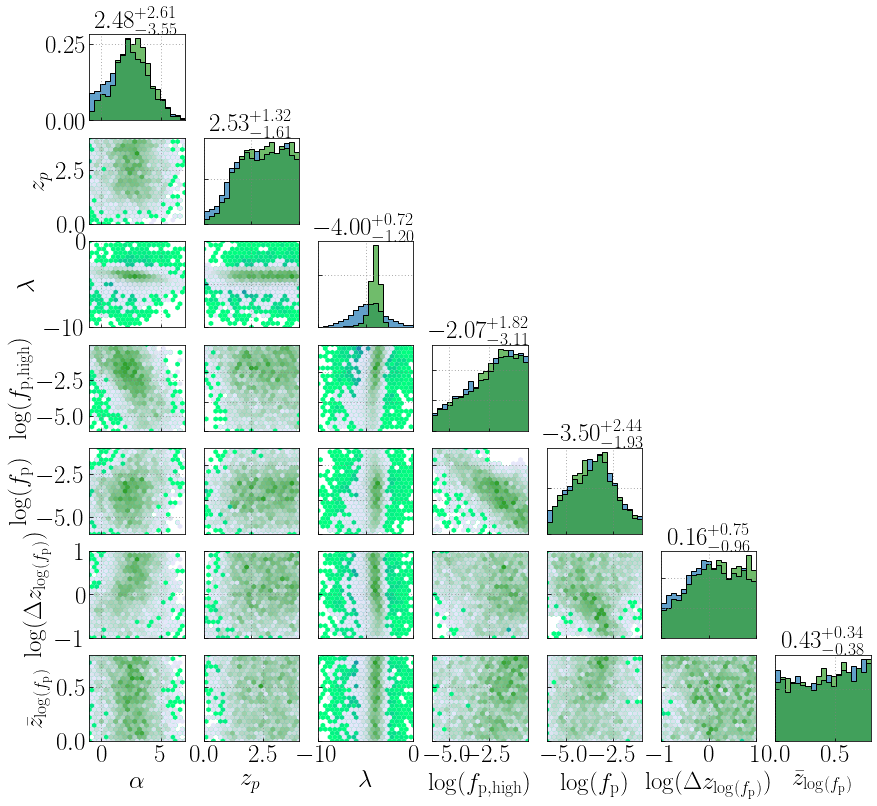

In [5]:
fig = plt.figure(figsize=(14,13))

toPlot = {
    "alpha_z":{"data":samps_peak.alpha_z,"plot_bounds":(-1,7),"label":r"$\alpha$"},
    "zp":{"data":samps_peak.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":samps_peak.alpha_ref,"plot_bounds":(-10,0),"label":r"$\lambda$"},
    "log_high_f_peak":{"data":samps_peak.log_high_f_peak,"plot_bounds":(-6,-0.1),"label":r"$\log(f_{\rm p, \mathrm{high}})$"},
    "fpeak":{"data":samps_peak.log_f_peak,"plot_bounds":(-6,-1),"label":r"$\log(f_{\rm p})$"},
    "width_f_peak":{"data":samps_peak.log_width_f_peak,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{\log(f_\mathrm{p})})$"},
    "middle_z_f_peak":{"data":samps_peak.middle_z_f_peak,"plot_bounds":(0,0.8),"label":r"$\bar z_{\log(f_\mathrm{p})}$"},
}

toPlot_pl = {
    "alpha_z":{"data":samps_power_law.alpha_z,"plot_bounds":(-1,7),"label":r"$\alpha$"},
    "zp":{"data":samps_power_law.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":samps_power_law.alpha_ref,"plot_bounds":(-10,0),"label":r"$\lambda$"},
    "log_high_f_peak":{"data":samps_power_law.log_high_f_peak,"plot_bounds":(-6,-0.1),"label":r"$\log(f_{\rm p, \mathrm{high}})$"},
    "fpeak":{"data":samps_power_law.log_f_peak,"plot_bounds":(-6,-1),"label":r"$\log(f_{\rm p})$"},
    "width_f_peak":{"data":samps_power_law.log_width_f_peak,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{\log(f_\mathrm{p})})$"},
    "middle_z_f_peak":{"data":samps_power_law.middle_z_f_peak,"plot_bounds":(0,0.8),"label":r"$\bar z_{\log(f_\mathrm{p})}"},
}

plot_corner_2(fig,toPlot_pl,toPlot,'#1f78b4','#33a02c',labelsize=25)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.tight_layout()
plt.savefig("PE_f_peak_comparison.pdf", dpi = 400, bbox_inches='tight')
plt.show()